In [4]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 현재 경로 확인
!pwd

/content


In [6]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


## Block연산과 Window연산

In [11]:
from skimage.util import view_as_blocks, view_as_windows
import matplotlib.pyplot as plt
import skimage
from skimage.data import camera
import numpy as np

## Block

```
겹치지 않게 동일한 크기의 block형태로 분할연산을 한다 
```

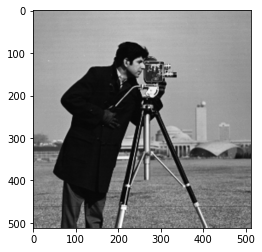

In [12]:
camera = camera()
plt.imshow(camera, cmap='gray')

In [15]:
view_as_blocks(camera, (4,4)).shape # 4x4형태로 가로, 세로 128등분 나눠준다 / 겹치지 않게 자르는 방법 

(128, 128, 4, 4)

In [16]:
camera.shape

(512, 512)

In [17]:
block = view_as_blocks(camera, (4,4))

In [20]:
block[0,0].mean() # 4x4 이미지를 하나의 값으로 표현할 수 있다 

157.125

In [22]:
block_flatten = block.reshape(block.shape[0],block.shape[1],-1)

In [23]:
block_flatten.shape

(128, 128, 16)

In [24]:
block_flatten[0,0]

array([156, 157, 160, 159, 156, 157, 159, 158, 158, 157, 156, 156, 160,
       157, 154, 154], dtype=uint8)

In [25]:
block_flatten.mean(axis=2) # 맨 마지막 차원을 평균으로 구해서 128x128 형태로 결과를 낸다

array([[157.125 , 156.625 , 157.5625, ..., 154.75  , 152.4375, 152.1875],
       [156.875 , 156.125 , 157.625 , ..., 154.875 , 152.6875, 152.875 ],
       [154.375 , 156.6875, 156.8125, ..., 148.9375, 150.125 , 151.4375],
       ...,
       [115.5625, 104.5   , 131.    , ..., 102.3125,  91.5   , 101.3125],
       [120.5   , 109.25  , 121.125 , ..., 113.    , 126.5   , 120.75  ],
       [124.0625, 138.5625, 138.75  , ..., 129.4375, 128.375 , 118.9375]])

In [26]:
block_flatten.mean(axis=2).shape

(128, 128)

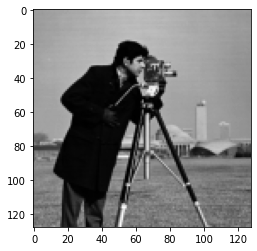

In [30]:
plt.imshow(block_flatten.mean(axis=2), cmap='gray') 

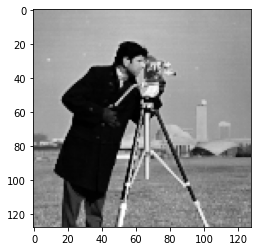

In [31]:
plt.imshow(block_flatten.max(axis=2), cmap='gray') 

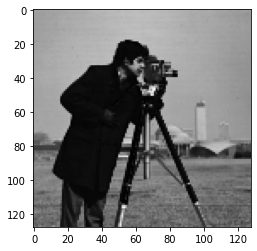

In [32]:
plt.imshow(block_flatten.min(axis=2), cmap='gray') 

## Winow

```
좌상에서 우하 방향으로 겹치면서 동일한 크기의 block형태로 연산을 한다 
디테일을 유지한체 이미지를 변화시키는 기법
```

In [37]:
view_as_windows(camera, (4,4)).shape

(509, 509, 4, 4)

In [38]:
512-4+1

509

In [40]:
view_as_windows(camera, (4,4),2).shape

(255, 255, 4, 4)

In [47]:
512/2 - 1

255.0

In [13]:
window = view_as_windows(camera, (4,4))
window_flatten = window.reshape(window.shape[0],window.shape[1],-1)

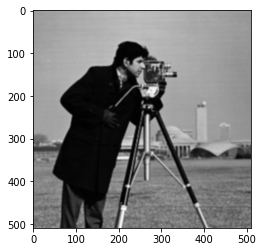

In [52]:
plt.imshow(winow_flatten.mean(axis=2), cmap='gray')

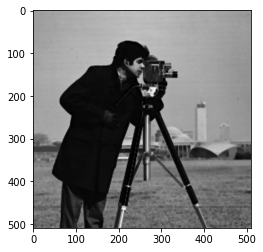

In [53]:
plt.imshow(winow_flatten.min(axis=2), cmap='gray')

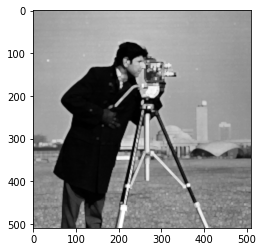

In [54]:
plt.imshow(winow_flatten.max(axis=2), cmap='gray')

## Correlation, Convolution

```python
1. Correlation 
- 데이터를 상하, 좌우 반전하지 않고 필터를 통해 합성곱 연산을 한다 
2. Convolution 
- 데이터를 상하, 좌우 반전후 correlation연산을 하는 방법  
```

In [19]:
def corr(im, kernel, stride=1): # im: 2d
  h,w = im.shape 
  out_h = (h-kernel.shape[0]//stride) + 1
  out_w = (w-kernel.shape[1]//stride) + 1 
  output = np.zeros((out_h, out_w))
  for i in range(out_h):
    for j in range(out_w):
      output[i,j] = (kernel*im[i:i+kernel.shape[0]*stride, j:j+kernel.shape[1]*stride]).sum()
  return output

In [20]:
def filter_by_conv(im, kernel, stride=1): # im: 2d
  h,w = im.shape 
  kernel = np.flipud(np.fliplr(kernel)) # 커널이 상-하, 좌-우가 반전된다 
  out_h = (h-kernel.shape[0]//stride) + 1
  out_w = (w-kernel.shape[1]//stride) + 1 
  output = np.zeros((out_h, out_w))
  for i in range(out_h):
    for j in range(out_w):
      output[i,j] = (kernel*im[i:i+kernel.shape[0]*stride, j:j+kernel.shape[1]*stride]).sum()
  return output

In [79]:
im1 = np.arange(36).reshape(6,6)
kernel = np.array([[1,2],[2,1]])
conv(im1, kernel)

array([[ 21.,  27.,  33.,  39.,  45.],
       [ 57.,  63.,  69.,  75.,  81.],
       [ 93.,  99., 105., 111., 117.],
       [129., 135., 141., 147., 153.],
       [165., 171., 177., 183., 189.]])

In [23]:
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

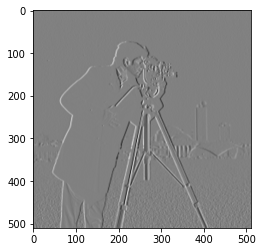

In [112]:
plt.imshow(corr(camera,kernel), cmap='gray')

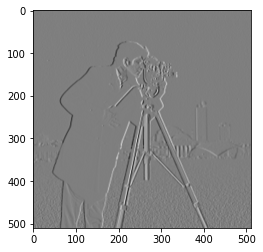

In [113]:
plt.imshow(filter_by_conv(camera, kernel), cmap='gray')

In [17]:
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])/16 # 가우시안 형태 

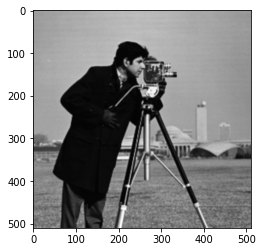

In [21]:
plt.imshow(corr(camera,kernel), cmap='gray') # 가우시안 블러 

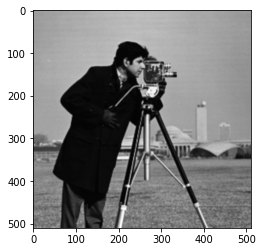

In [22]:
plt.imshow(filter_by_conv(camera, kernel), cmap='gray')

## 전처리 관점

In [119]:
!pip install -U scikit-learn

     |████████████████████████████████| 23.1 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [29]:
from sklearn.datasets import load_breast_cancer, load_wine, load_iris
import seaborn as sns

In [26]:
cancer = load_breast_cancer(as_frame=True)
wine = load_wine(as_frame=True)
iris = load_iris(as_frame=True)

In [ ]:
print(data.DESCR)

```
feature extraction은 데이터의 특성을 가장 잘나타나는 형태로 데이터를 구성하는 방법이다   
```

In [28]:
cancer.frame # 특징을 잘 나타내는 값으로 표현했다 (feature extraction) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [31]:
iris.frame # 데이터를 그대로 사용해도 특성을 띄기 때문에 전처리를 하지 않아도 된다 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
sns.pairplot(wine.frame, hue='target') # 

Output hidden; open in https://colab.research.google.com to view.

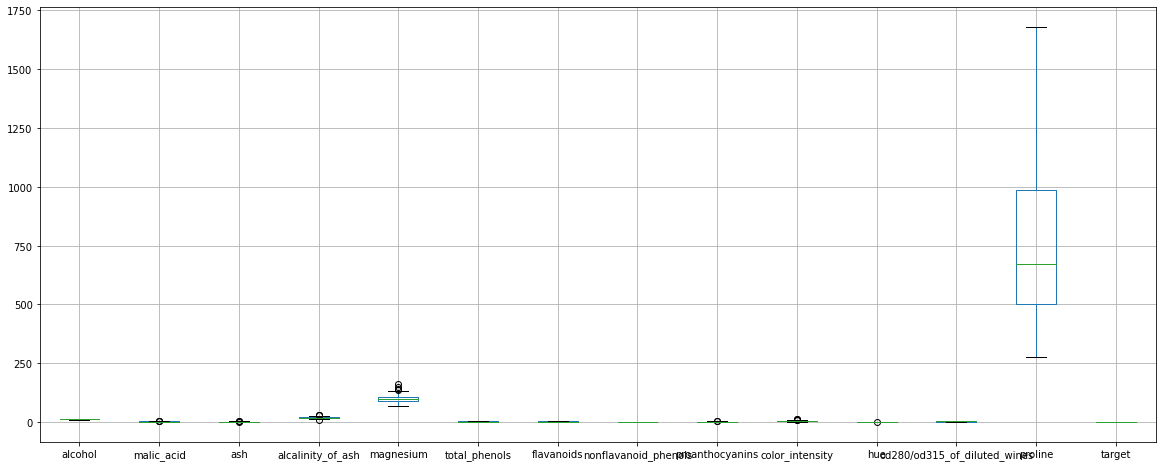

In [32]:
# 원본 데이터를 그 특성에 제일 잘 맞게 다른 형태의 데이터로 변화 시킬 필요가 있다 => Featured data 형태로 바꾼다 
# min-max 또는 standard scaling을 사용해서 비정상적으로 영향력이 커지는 경우를 방지하기도 한다 
wine.frame.boxplot(figsize=(20,8))  

```python
Image의 문제점

1. 2차원 데이터 => 1차원 데이터 변환하는 과정에 column이 너무 많아진다 
2. i.i.d(비정형 데이터의 특성)에서 벗어난다 => 전통적인 머신러닝을 사용하여 성능을 높이려면 가정이 많이 필요하다
3. 이미지 자체가 특성이 뚜렷하지 않은 경우 feature extraction을 통해 featured data로 변환해야 한다 
```

## 어떤 필터를 적용하면 성능이 높아질까?

```
filter
- filter를 사용하면 가장 특징이 잘 나타나게 data를 변형 할 수 있다 (특징의 존재 여부로 문제를 변형한다)
- filter를 사용하여 이미지의 특성을 뚜렷하게 만든다 
- filter를 사용하면 특징을 유지한체 크기가 줄어들기 때문에 데이터의 차원이 줄어드는 효과를 기대할 수 있다 
- filter는 feature cross와 유사하다 
```

### Feature cross

```
feature를 합성해서 본래 갖고 있던 의미를 잃지 않은 채로 차원을 축소시키는 방법 
```

```
filter를 사용하면 image 데이터의 문제점을 보완해주기 때문에 굉장히 좋은 방법이지만, 
어떤 filter를 사용해야 하는지 선택하는 문제는 어려운 문제이다 

결국 어떤 필터를 적용할지 학습을 통해서 찾을수 있지 않을까? 하는 의문으로 해결하게 된다 
```

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
ss = StandardScaler()

In [37]:
wine.frame.iloc[:,:-1] = ss.fit_transform(wine.frame.iloc[:,:-1])

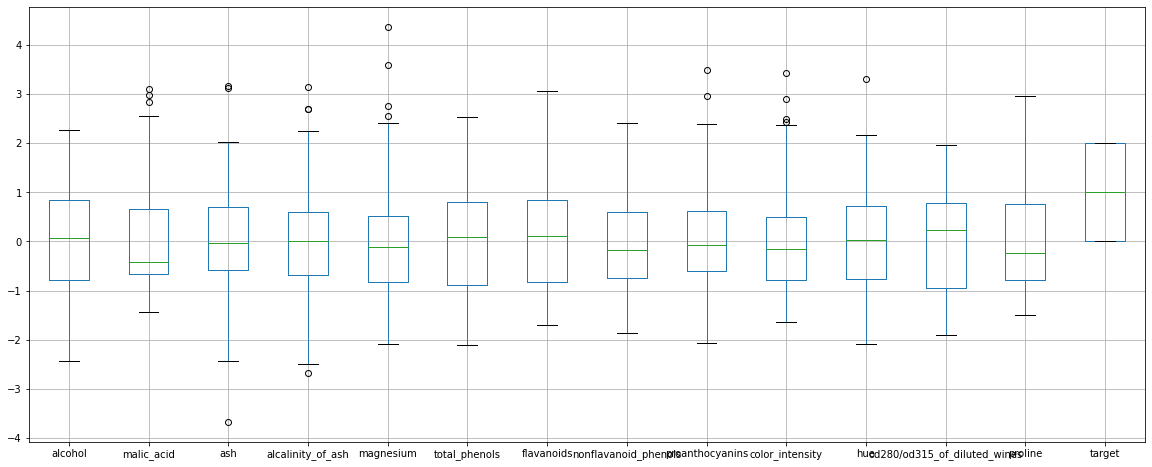

In [39]:
wine.frame.boxplot(figsize=(20,8)) # 데이터가 다른 형태로 바뀌었다 

## Convolution Neural Network 

```
- 1989
- 1991 LeNet-1 
- 1997 LeNet-5 (MNIST)

```

## convolution filter의 특징

```python 
1. neural network 연산과 똑같다 (곱 + 합) 
2. window연산을 하기 때문에 전통적인 fully connected 방식과 달리 구해야할 weight의 수가 급격하게 줄어든다 (parameter가 줄어든다)
=> 차원의 저주를 피할 수 있다 
3. stationarity: 이미지의 특정 구간에서 filter를 거친 값이 A라고 했을 때 또 다른 구간에서 A라는 값이나오면 두 구간은 특성이 같다(numerical stability와 유사한 의미)
=> 서로 다른 위치의 값이 유사할 경우 그 부분은 특성이 유사하다 
```